**Getting Started with Images**

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


In [7]:
# Load an color image in grayscale
img = cv2.imread('sample.jpg',1)

In [5]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
print(type(cv2.imwrite('sample_save.png',img)))

<class 'bool'>


In [18]:
# print(help(cv2.waitKey))

In [16]:
print(cv2.imread('sample.jpg',-1).shape)

(716, 1080, 3)


In [13]:
img = cv2.imread('sample.jpg',-1)
cv2.imshow('image',img)
k = cv2.waitKey(0)
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()
elif k == ord('s'): # wait for 's' key to save and exit
    cv2.imwrite('messigray.png',img)
    cv2.destroyAllWindows()

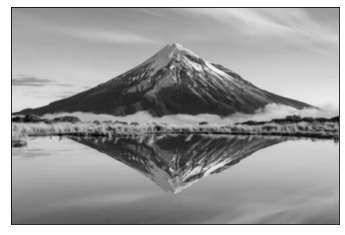

In [17]:
img = cv2.imread('sample.jpg',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [1]:
# #video
# cap = cv2.VideoCapture(0)

# while(True):
#     # Capture frame-by-frame
#     ret, frame = cap.read()

#     # Our operations on the frame come here
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#     # Display the resulting frame
#     cv2.imshow('frame',gray)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # When everything done, release the capture
# cap.release()
# cv2.destroyAllWindows()

In [18]:
cap = cv2.VideoCapture('sample_video.mp4')
print(type(cap))
while(cap.isOpened()):
    
    ret, frame = cap.read()
#     print(ret)
#     break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

<class 'cv2.VideoCapture'>


In [4]:
# write video

# cap = cv2.VideoCapture(0)

# # Define the codec and create VideoWriter object
# fourcc = cv2.VideoWriter_fourcc(*'XVID')
# out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))

# while(cap.isOpened()):
#     ret, frame = cap.read()
#     if ret==True:
#         frame = cv2.flip(frame,0)

#         # write the flipped frame
#         out.write(frame)

#         cv2.imshow('frame',frame)
#         if cv2.waitKey(1) & 0xFF == ord('q'):
#             break
#     else:
#         break

# # Release everything if job is finished
# cap.release()
# out.release()
# cv2.destroyAllWindows()

In [9]:
# Drawing Line
# Create a black image
img = np.zeros((512,512,4), np.uint8)

# Draw a diagonal blue line with thickness of 5 px
# img = cv2.line(img,(0,0),(511,511),(255,1,0),5)
# img = cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)
# img = cv2.circle(img,(447,63), 63, (0,0,255), -1)
# img = cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(img,[pts],True,(255,255,255))
print(type(img))
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

<class 'numpy.ndarray'>


In [28]:
#handle mouse event in cv2
# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_RBUTTONDBLCLK:
        cv2.circle(img,(x,y),100,(255,0,0),-1)

# Create a black image, a window and bind the function to window
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

In [34]:
# More Advanced Demo
drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0XFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break

cv2.destroyAllWindows()

In [44]:
def nothing(x):
    pass

# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

    # get current positions of four trackbars
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    s = cv2.getTrackbarPos(switch,'image')
    
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]
#         print(img)
        break

cv2.destroyAllWindows()

In [43]:
# a=[]
# a[:]=[1,2,3]
# print(a)

[1, 2, 3]


In [51]:
# Basic Operations on Images
print("access rgb pixel")
img=cv2.imread('sample.jpg')
print(img[10][10])
print("access blue pixel")
print(img[10][10][0])
#modify 
#You can modify the pixel values the same way.
img[10][10][0]=233
# Better pixel accessing and editing method :

# accessing RED value
img.item(10,10,2)


# modifying RED value
img.itemset((10,10,2),100)
img.item(10,10,2)

print("Accessing Image Properties")
print(img.shape)
print(img.size)
print(img.dtype)

access rgb pixel
[234 149 104]
access blue pixel
234
Accessing Image Properties
(716, 1080, 3)
2319840
uint8


In [4]:
# Image ROI
ball = img[280:340, 330:390]
img[273:333, 100:160] = ball
cv2.imshow('image_change',img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [9]:
# Splitting and Merging Image Channels
b,g,r = cv2.split(img)
print("all blue pixel")
b = img[:,:,0] #method 2
print(b)
#merge
img = cv2.merge((g,b,r))
cv2.imshow('split_image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
#make all the red pixels to zero
img[:,:,2] = 0
# note:
# cv2.split() is a costly operation (in terms of time), 
# so only use it if necessary. Numpy indexing is much 
# more efficient and should be used if possible.

[[254 254 254 ... 252 252 252]
 [220 220 220 ... 223 223 223]
 [222 222 222 ... 228 228 228]
 ...
 [144 144 144 ... 152 152 152]
 [142 142 142 ... 152 152 152]
 [141 141 141 ... 152 152 152]]


(<matplotlib.axes._subplots.AxesSubplot at 0x7f0af01577f0>,
 Text(0.5, 1.0, 'CONSTANT'))

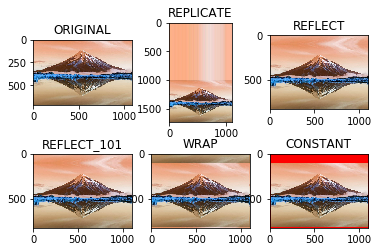

In [24]:
#Making Borders for Images (Padding)
BLUE = [255,0,0]

img1 = cv2.imread('sample.jpg',1)

replicate = cv2.copyMakeBorder(img1,1000,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,100,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,100,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,100,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,100,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

In [22]:
# Arithmetic Operations on Images
# Image Addition
x = np.uint8([250])
y = np.uint8([10])
print(x)
print(cv2.add(x,y))
# 250+10 = 260 => 255

print(x+y)
# 250+10 = 260 % 256 = 4
# It will be more visible when you add two images. 
# OpenCV function will provide a better result. 
# So always better stick to OpenCV functions.

[250]
[[255]]
[4]


In [43]:
# Image Blending
img1 = cv2.imread('sample_1.jpg')
img2 = cv2.imread('sample_2.jpg')

# dst = cv2.add(img1,img2)
dst = cv2.addWeighted(img1,0.6,img2,0.4,0)
# print(dst)

cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [68]:
# Bitwise Operations
# This includes bitwise AND, OR, NOT and XOR operations. They will be highly useful while 
# extracting any part of the image (as we will see in coming chapters), defining and working 
# with non-rectangular ROI etc.
# Load two images
img1 = cv2.imread('messi5.jpg')
cv2.imshow('img1',img1)
img2 = cv2.imread('opencv_logo.png')
cv2.imshow('img2',img2)
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
print("-----------------thread bynary threadhold")
cv2.imshow('mask',mask)
mask_inv = cv2.bitwise_not(mask)
print("-----------------thread bynary threadhold invert")
cv2.imshow('mask_inv',mask_inv)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
cv2.imshow('img1_bg',img1_bg)


# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
cv2.imshow('img2_fg',img2_fg)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

-----------------thread bynary threadhold
-----------------thread bynary threadhold invert


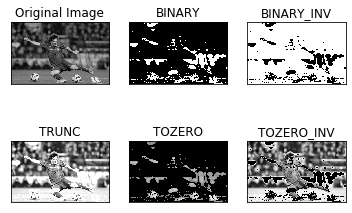

In [55]:
# Image Thresholding
# Simple Thresholding
img = cv2.imread('messi5.jpg',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()


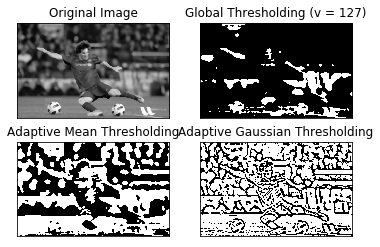

In [60]:
# Adaptive Thresholding
# In the previous section, we used a global value as threshold value. But it may not be 
# good in all the conditions where image has different lighting conditions in different areas. 
# In that case, we go for adaptive thresholding.
# In this, the algorithm calculate the threshold for a small regions of the image. 
# So we get different thresholds for different regions of the same image and it gives us 
# better results for images with varying illumination.
img = cv2.imread('messi5.jpg',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,101,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

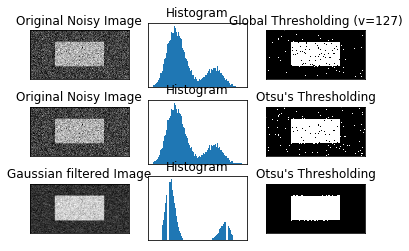

In [62]:
img = cv2.imread('noisy2.jpeg',0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [69]:
# Performance Measurement and Improvement Techniques
# Measuring Performance with OpenCV


img1 = cv2.imread('messi5.jpg')

e1 = cv2.getTickCount()
for i in range(5,49,2):
    img1 = cv2.medianBlur(img1,i)
e2 = cv2.getTickCount()
t = (e2 - e1)/cv2.getTickFrequency()
print(t)



0.358487385


In [72]:
# Default Optimization in OpenCV
cv2.useOptimized()
%timeit res = cv2.medianBlur(img,49)
cv2.setUseOptimized(False)
cv2.useOptimized()
%timeit res = cv2.medianBlur(img,49)
#Note

# Python scalar operations are faster than Numpy scalar operations. So for operations 
# including one or two elements, Python scalar is better than Numpy arrays. Numpy takes 
# advantage when size of array is a little bit bigger.


# Performance Optimization Techniques
# 1. Avoid using loops in Python as far as possible, especially double/triple loops etc. They are inherently slow.
# 2. Vectorize the algorithm/code to the maximum possible extent because Numpy and OpenCV are optimized for 
# vector operations.
# 3. Exploit the cache coherence.
# 4. Never make copies of array unless it is needed. Try to use views instead. Array copying is a costly operation.

1.42 ms ± 67.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.65 ms ± 64.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Image Processing in OpenCV


In [11]:
# Changing Colorspaces
import cv2
import numpy as np

cap = cv2.VideoCapture('sample_video.mp4')

while(1):

    # Take each frame
    _, frame = cap.read()
#     print(frame)
    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
#     print( 124 in mask)
#     break
    
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()




error: OpenCV(4.1.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [5]:
import numpy as np
import cv2 as cv2
#convert brg to hsv
green = np.uint8([[[0,255,0 ]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print(hsv_green)

[[[ 60 255 255]]]


In [10]:
# Geometric Transformations of Images
# Transformations

import cv2
import numpy as np

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv2.getAffineTransform(pts1,pts2)
print(M)
cap = cv2.VideoCapture('sample_video.mp4')
while cap.isOpened():
    read, image = cap.read()
    if not read:
        break
    rows, cols = image.shape[:2]
    image = cv2.warpAffine(image, M, (cols, rows))
    cv2.imshow('image', image)
    if cv2.waitKey(1) & 0xFF == 27: # aka ESCAPE
        break

cv2.destroyAllWindows()
cap.release()

[[  1.26666667   0.6        -83.33333333]
 [ -0.33333333   1.          66.66666667]]


In [1]:
# Scaling
import cv2
import numpy as np

img = cv2.imread('messi5.jpg')

res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

#OR

height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
cv2.imshow('image', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
# Translation
import cv2
import numpy as np

img = cv2.imread('messi5.jpg',0)
rows,cols = img.shape

M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))

cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
# Rotation
img = cv2.imread('messi5.jpg',0)
rows,cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))
cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

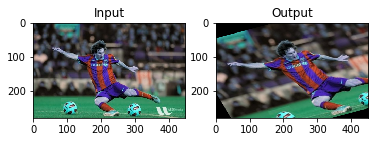

In [8]:
# Affine Transformation

import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('messi5.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

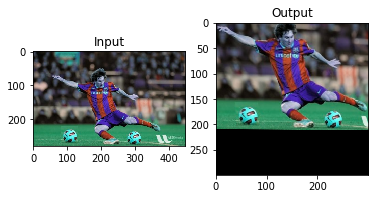

In [9]:
# Perspective Transformation
img = cv2.imread('messi5.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

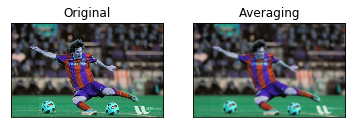

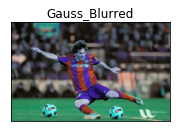

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4aa4202a90>,
 Text(0.5, 1.0, 'Bilateral'))

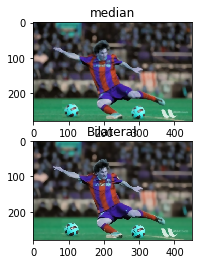

In [18]:
# Smoothing Images
# 2D Convolution ( Image Filtering )
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('messi5.jpg')

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

# Image Blurring (Image Smoothing)
# 1. Averaging
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('messi5.jpg')

blur = cv2.blur(img,(5,5))
gauss_blur = cv2.GaussianBlur(img,(5,5),0)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(211),plt.imshow(gauss_blur),plt.title('Gauss_Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

# 2. Gaussian Filtering
# gauss_blur = cv2.GaussianBlur(img,(5,5),0)
# 3. Median Filtering
median = cv2.medianBlur(img,5)
plt.subplot(211),plt.imshow(median),plt.title('median')
# 4. Bilateral Filtering
Bilateral = cv2.bilateralFilter(img,9,75,75)
plt.subplot(212),plt.imshow(Bilateral),plt.title('Bilateral')


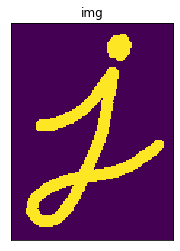

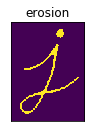

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

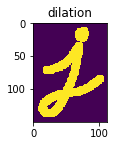

In [24]:
# Morphological Transformations
import cv2
import numpy as np
#erosion
img = cv2.imread('j.png',0)
plt.subplot(111),plt.imshow(img),plt.title('img')
plt.xticks([]), plt.yticks([])
plt.show()
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.subplot(211),plt.imshow(erosion),plt.title('erosion')
plt.xticks([]), plt.yticks([])
plt.show()

dilation = cv2.dilate(img,kernel,iterations = 1)
plt.subplot(211),plt.imshow(dilation),plt.title('dilation')

#opening: erosion followed by dilation
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# Closing:Dilation followed by Erosion
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)


# difference between dilation and erosion of an image.
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

#tophat:difference between input image and Opening of the image.
#blackhat:difference between the closing of the input image and input image.
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

# Structuring Element
cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))


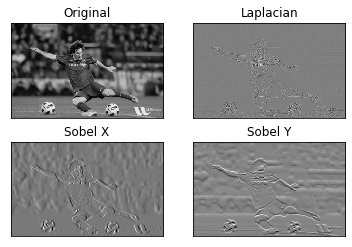

In [26]:
# Image Gradients
# 1. Sobel and Scharr Derivatives
# 2. Laplacian Derivatives


import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('messi5.jpg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()


One Important Matter!
In our last example, output datatype is cv2.CV_8U or np.uint8. But there is a slight problem with that. Black-to-White transition is taken as Positive slope (it has a positive value) while White-to-Black transition is taken as a Negative slope (It has negative value). So when you convert data to np.uint8, all negative slopes are made zero. In simple words, you miss that edge.

If you want to detect both edges, better option is to keep the output datatype to some higher forms, like cv2.CV_16S, cv2.CV_64F etc, take its absolute value and then convert back to cv2.CV_8U. Below code demonstrates this procedure for a horizontal Sobel filter and difference in results.

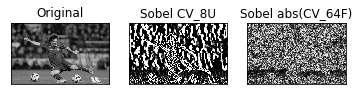

In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('messi5.jpg',0)

# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)

# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])

plt.show()

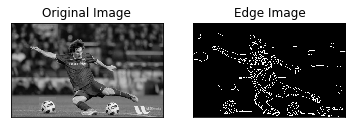

In [28]:
# Canny Edge Detection in OpenCV
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('messi5.jpg',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

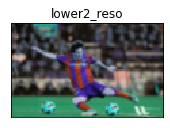

In [40]:
# Image Pyramids
img = cv2.imread('messi5.jpg')
lower_reso = cv2.pyrDown(img)
lower2_reso = cv2.pyrDown(lower_reso)
plt.subplot(211),plt.imshow(lower_reso,cmap = 'gray')

plt.subplot(122),plt.imshow(lower2_reso,cmap = 'gray')
plt.title('lower2_reso'), plt.xticks([]), plt.yticks([])

plt.show()


In [44]:
# # Image Blending using Pyramids
# import cv2
# import numpy as np,sys

# A = cv2.imread('apple.jpg')
# B = cv2.imread('orange.jpg')

# # generate Gaussian pyramid for A
# G = A.copy()
# gpA = [G]
# for i in range(6):
#     G = cv2.pyrDown(G)
#     gpA.append(G)

# # generate Gaussian pyramid for B
# G = B.copy()
# gpB = [G]
# for i in range(6):
#     G = cv2.pyrDown(G)
#     gpB.append(G)

# # generate Laplacian Pyramid for A
# lpA = [gpA[5]]
# for i in range(5,0,-1):
#     GE = cv2.pyrUp(gpA[i])
#     L = cv2.subtract(gpA[i-1],GE)
#     lpA.append(L)

# # generate Laplacian Pyramid for B
# lpB = [gpB[5]]
# for i in range(5,0,-1):
#     GE = cv2.pyrUp(gpB[i])
#     L = cv2.subtract(gpB[i-1],GE)
#     lpB.append(L)

# # Now add left and right halves of images in each level
# LS = []
# for la,lb in zip(lpA,lpB):
#     rows,cols,dpt = la.shape
#     ls = np.hstack((la[:,0:cols/2], lb[:,cols/2:]))
#     LS.append(ls)

# # now reconstruct
# ls_ = LS[0]
# for i in range(1,6):
#     ls_ = cv2.pyrUp(ls_)
#     ls_ = cv2.add(ls_, LS[i])

# # image with direct connecting each half
# real = np.hstack((A[:,:cols/2],B[:,cols/2:]))

# cv2.imwrite('Pyramid_blending2.jpg',ls_)
# cv2.imwrite('Direct_blending.jpg',real)

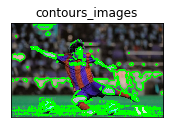

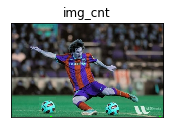

In [62]:
# Contours : Getting Started
import numpy as np
import cv2

im = cv2.imread('messi5.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
contours,hierachy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# print(contours)
im = cv2.drawContours(im, contours, -1, (0,255,0), 3)
plt.subplot(122),plt.imshow(im,cmap = 'gray')
plt.title('contours_images'), plt.xticks([]), plt.yticks([])

plt.show()

cnt = contours[10]
img_cnt = cv2.drawContours(img, [cnt], 0, (0,255,0), 3)
plt.subplot(122),plt.imshow(img_cnt,cmap = 'gray')
plt.title('img_cnt'), plt.xticks([]), plt.yticks([])

plt.show()

Contour Approximation Method.
This is the third argument in cv2.findContours function. What does it denote actually?

Above, we told that contours are the boundaries of a shape with same intensity. It stores the (x,y) coordinates of the boundary of a shape. But does it store all the coordinates ? That is specified by this contour approximation method.

If you pass cv2.CHAIN_APPROX_NONE, all the boundary points are stored. But actually do we need all the points? For eg, you found the contour of a straight line. Do you need all the points on the line to represent that line? No, we need just two end points of that line. This is what cv2.CHAIN_APPROX_SIMPLE does. It removes all redundant points and compresses the contour, thereby saving memory.

Below image of a rectangle demonstrate this technique. Just draw a circle on all the coordinates in the contour array (drawn in blue color). First image shows points I got with cv2.CHAIN_APPROX_NONE (734 points) and second image shows the one with cv2.CHAIN_APPROX_SIMPLE (only 4 points). See, how much memory it saves!!!

Contour Features

Moments
Image moments help you to calculate some features like center of mass of the object, area of the object etc. Check out the wikipedia page on Image Moments

The function cv2.moments() gives a dictionary of all moment values calculated. See below:

In [105]:
import cv2
import numpy as np

img = cv2.imread('messi5.jpg',0)
ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[240]
print(cnt)
M = cv2.moments(cnt)
print(M)

[[[341 246]]

 [[340 247]]

 [[336 247]]

 [[337 248]]

 [[339 248]]

 [[340 247]]

 [[341 247]]

 [[342 248]]

 [[343 248]]

 [[344 247]]

 [[347 247]]

 [[347 246]]]
{'m00': 11.5, 'm10': 3933.333333333333, 'm01': 2839.5, 'm20': 1345408.75, 'm11': 971180.625, 'm02': 701112.9166666666, 'm30': 460233523.70000005, 'm21': 332191674.1333333, 'm12': 239795664.73333332, 'm03': 173115568.65, 'mu20': 94.74033816461451, 'mu11': -10.679347826051526, 'mu02': 3.329710144898854, 'mu30': -74.03857046365738, 'mu21': 10.24155635383795, 'mu12': -1.139645039414063, 'mu03': 0.27618148922920227, 'nu20': 0.716373067407293, 'nu11': -0.08075121229528563, 'nu02': 0.025177392399991335, 'nu30': -0.16508720846992564, 'nu21': 0.022836069608778573, 'nu12': -0.002541119000883694, 'nu03': 0.0006158145788389601}


2. Contour Area
Contour area is given by the function cv2.contourArea() or from moments, M[‘m00’].

In [106]:
area = cv2.contourArea(cnt)
print(area)

11.5


3. Contour Perimeter
It is also called arc length. It can be found out using cv2.arcLength() function. Second argument specify whether shape is a closed contour (if passed True), or just a curve.

In [107]:
perimeter = cv2.arcLength(cnt,True)
print(perimeter)

25.071067690849304


4. Contour Approximation


It approximates a contour shape to another shape with less number of vertices depending upon the precision we specify. It is an implementation of Douglas-Peucker algorithm. Check the wikipedia page for algorithm and demonstration.

To understand this, suppose you are trying to find a square in an image, but due to some problems in the image, you didn’t get a perfect square, but a “bad shape” (As shown in first image below). Now you can use this function to approximate the shape. In this, second argument is called epsilon, which is maximum distance from contour to approximated contour. It is an accuracy parameter. A wise selection of epsilon is needed to get the correct output.

In [108]:
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
print(approx)

[[[336 247]]

 [[347 246]]]


5. Convex Hull

Convex Hull will look similar to contour approximation, but it is not (Both may provide same results in some cases). Here, cv2.convexHull() function checks a curve for convexity defects and corrects it. Generally speaking, convex curves are the curves which are always bulged out, or at-least flat. And if it is bulged inside, it is called convexity defects. For example, check the below image of hand. Red line shows the convex hull of hand. The double-sided arrow marks shows the convexity defects, which are the local maximum deviations of hull from contours.

In [109]:
hull = cv2.convexHull(cnt,returnPoints=True)
print(hull)#coordinate of points of hull
hull = cv2.convexHull(cnt,returnPoints=False)
print(hull)#index of points of hull in contour: index 5 is 414 267

[[[347 247]]

 [[343 248]]

 [[337 248]]

 [[336 247]]

 [[341 246]]

 [[347 246]]]
[[10]
 [ 8]
 [ 3]
 [ 2]
 [ 0]
 [11]]


6. Checking Convexity

There is a function to check if a curve is convex or not, cv2.isContourConvex(). It just return whether True or False. Not a big deal.



In [110]:
k = cv2.isContourConvex(cnt)
print(k)

False


7. Bounding Rectangle

There are two types of bounding rectangles.

7.a. Straight Bounding Rectangle

It is a straight rectangle, it doesn’t consider the rotation of the object. So area of the bounding rectangle won’t be minimum. It is found by the function cv2.boundingRect().

Let (x,y) be the top-left coordinate of the rectangle and (w,h) be its width and height.

In [111]:
x,y,w,h = cv2.boundingRect(cnt)
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

7.b. Rotated Rectangle

Here, bounding rectangle is drawn with minimum area, so it considers the rotation also. The function used is cv2.minAreaRect(). It returns a Box2D structure which contains following detals - ( top-left corner(x,y), (width, height), angle of rotation ). But to draw this rectangle, we need 4 corners of the rectangle. It is obtained by the function cv2.boxPoints()

In [122]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
im = cv2.drawContours(im,[box],0,(0,0,255),2)
cv2.imshow('image',im)
cv2.waitKey(0)
cv2.destroyAllWindows()

8. Minimum Enclosing Circle

Next we find the circumcircle of an object using the function cv2.minEnclosingCircle(). It is a circle which completely covers the object with minimum area.

In [121]:
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img = cv2.circle(img,center,radius,(0,255,0),2)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

9. Fitting an Ellipse

Next one is to fit an ellipse to an object. It returns the rotated rectangle in which the ellipse is inscribed.

In [120]:
ellipse = cv2.fitEllipse(cnt)
im = cv2.ellipse(im,ellipse,(0,255,0),2)
cv2.imshow('image',im)
cv2.waitKey(0)
cv2.destroyAllWindows()

10. Fitting a Line

Similarly we can fit a line to a set of points. Below image contains a set of white points. We can approximate a straight line to it.

In [124]:
rows,cols = img.shape[:2]
[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
img = cv2.line(img,(cols-1,righty),(0,lefty),(0,255,0),2)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Contour Properties

Here we will learn to extract some frequently used properties of objects like Solidity, Equivalent Diameter, Mask image, Mean Intensity etc. More features can be found at Matlab regionprops documentation.

(NB : Centroid, Area, Perimeter etc also belong to this category, but we have seen it in last chapter)

1. Aspect Ratio
It is the ratio of width to height of bounding rect of the object.

x,y,w,h = cv2.boundingRect(cnt)

aspect_ratio = float(w)/h

2. Extent

Extent is the ratio of contour area to bounding rectangle area.

area = cv2.contourArea(cnt)

x,y,w,h = cv2.boundingRect(cnt)

rect_area = w*h

extent = float(area)/rect_area

3. Solidity

Solidity is the ratio of contour area to its convex hull area.

area = cv2.contourArea(cnt)

hull = cv2.convexHull(cnt)

hull_area = cv2.contourArea(hull)

solidity = float(area)/hull_area

4. Equivalent Diameter

Equivalent Diameter is the diameter of the circle whose area is same as the contour area.



area = cv2.contourArea(cnt)

equi_diameter = np.sqrt(4*area/np.pi)

5. Orientation

Orientation is the angle at which object is directed. Following method also gives the Major Axis and Minor Axis lengths.

(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)

6. Mask and Pixel Points

In some cases, we may need all the points which comprises that object. It can be done as follows:

mask = np.zeros(imgray.shape,np.uint8)

cv2.drawContours(mask,[cnt],0,255,-1)

pixelpoints = np.transpose(np.nonzero(mask))

#pixelpoints = cv2.findNonZero(mask)

Here, two methods, one using Numpy functions, next one using OpenCV function (last commented line) are given to do the same. Results are also same, but with a slight difference. Numpy gives coordinates in (row, column) format, while OpenCV gives coordinates in (x,y) format. So basically the answers will be interchanged. Note that, row = x and column = y.


7. Maximum Value, Minimum Value and their locations

We can find these parameters using a mask image.

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(imgray,mask = mask)

8. Mean Color or Mean Intensity

Here, we can find the average color of an object. Or it can be average intensity of the object in grayscale mode. We again use the same mask to do it.

mean_val = cv2.mean(im,mask = mask)

9. Extreme Points

Extreme Points means topmost, bottommost, rightmost and leftmost points of the object.

leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])

rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])

topmost = tuple(cnt[cnt[:,:,1].argmin()][0])

bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

In [129]:
import cv2
import numpy as np

img = cv2.imread('star.jpg')

img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 127, 255,0)
contours,hierarchy = cv2.findContours(thresh,2,1)
cnt = contours[0]

hull = cv2.convexHull(cnt,returnPoints = False)
defects = cv2.convexityDefects(cnt,hull)

for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv2.line(img,start,end,[0,255,0],2)
    cv2.circle(img,far,5,[0,0,255],-1)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

2. Point Polygon Test

This function finds the shortest distance between a point in the image and a contour. It returns the distance which is negative when point is outside the contour, positive when point is inside and zero if point is on the contour.

For example, we can check the point (50,50) as follows:

dist = cv2.pointPolygonTest(cnt,(50,50),True)

In the function, third argument is measureDist. If it is True, it finds the signed distance. If False, it finds whether the point is inside or outside or on the contour (it returns +1, -1, 0 respectively).

Note

If you don’t want to find the distance, make sure third argument is False, because, it is a time consuming process. So, making it False gives about 2-3X speedup.

In [131]:
import cv2
import numpy as np

img1 = cv2.imread('star.jpg',0)
img2 = cv2.imread('star2.png',0)

ret, thresh = cv2.threshold(img1, 127, 255,0)
ret, thresh2 = cv2.threshold(img2, 127, 255,0)
contours,hierarchy = cv2.findContours(thresh,2,1)
cnt1 = contours[0]
contours,hierarchy = cv2.findContours(thresh2,2,1)
cnt2 = contours[0]

ret = cv2.matchShapes(cnt1,cnt2,1,0.0)
print(ret)

3.765360337141296


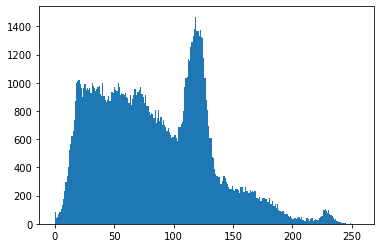

In [134]:
#histogram
img = cv2.imread('messi5.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist,bins = np.histogram(img.ravel(),256,[0,256])
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('messi5.jpg',0)
plt.hist(img.ravel(),256,[0,256]); plt.show()


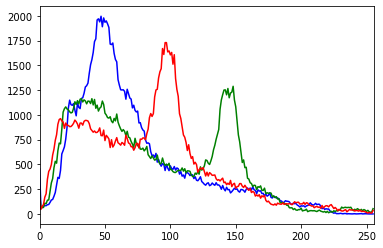

In [135]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('messi5.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

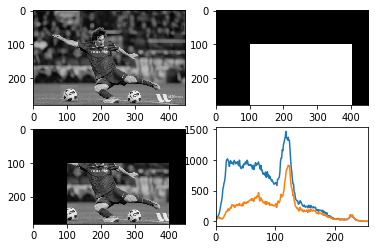

In [136]:
img = cv2.imread('messi5.jpg',0)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()

In [138]:
# Histograms Equalization in OpenCV
img = cv2.imread('messi5.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('messi_equalized.png',res)


True

In [139]:
img = cv2.imread('messi_equalized.png',0)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
#2D Histogram in OpenCV
img = cv2.imread('sample.jpg')
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

In [6]:
# 2D Histogram in Numpy
# import cv2
# import numpy as np
# from matplotlib import pyplot as plt

# img = cv2.imread('sample.jpg')
# hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

# hist, xbins, ybins = np.histogram2d(h.ravel(),s.ravel(),[180,256],[[0,180],[0,256]])

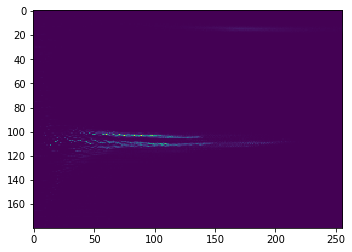

In [5]:
plt.imshow(hist,interpolation = 'nearest')
plt.show()

In [10]:
# Histogram Backprojection
import cv2
import numpy as np

roi = cv2.imread('roi.png')
hsv = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)

target = cv2.imread('messi5.png')
hsvt = cv2.cvtColor(target,cv2.COLOR_BGR2HSV)

# calculating object histogram
roihist = cv2.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )

# normalize histogram and apply backprojection
cv2.normalize(roihist,roihist,0,255,cv2.NORM_MINMAX)
dst = cv2.calcBackProject([hsvt],[0,1],roihist,[0,180,0,256],1)

# Now convolute with circular disc
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
cv2.filter2D(dst,-1,disc,dst)

# threshold and binary AND
ret,thresh = cv2.threshold(dst,50,255,0)
thresh = cv2.merge((thresh,thresh,thresh))
res = cv2.bitwise_and(target,thresh)

res = np.vstack((target,thresh,res))
cv2.imwrite('res.jpg',res)

True

(72, 77)
77
72


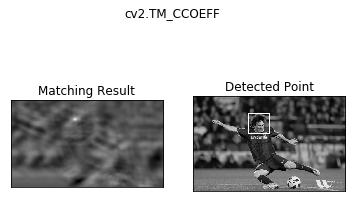

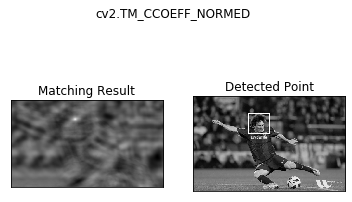

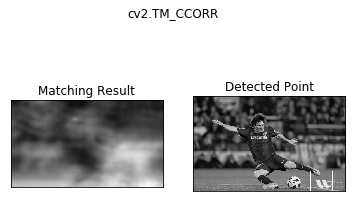

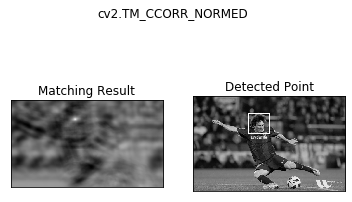

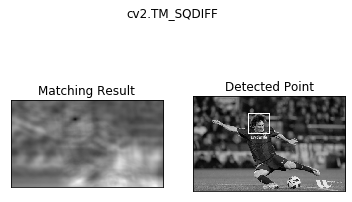

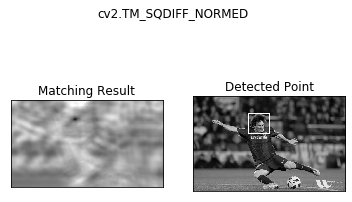

In [13]:
#template matching
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('messi5.png',0)
img2 = img.copy()
template = cv2.imread('template.png',0)
# print(template.shape)

#reverse a tuple [::-1]
w, h = template.shape[::-1]
print(w)
print(h)
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

In [16]:
# Template Matching with Multiple Objects
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv2.imread('mario.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('mario_coin.png',0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
# cv2.imshow('res',res)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

cv2.imwrite('res_mario_coin_matching.png',img_rgb)

True

In [18]:
# Hough Line Transform
import cv2
import numpy as np

img = cv2.imread('sudoku.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imwrite('houghlines3.jpg',img)

True

In [19]:
# Probabilistic Hough Transform
import cv2
import numpy as np

img = cv2.imread('sudoku.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2.imwrite('houghlines5.jpg',img)

True

In [22]:
import cv2
import numpy as np

img = cv2.imread('opencv_logo.png',0)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))
print(circles)
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

cv2.imshow('detected circles',cimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[[136 126  41]
  [ 92  40  40]
  [ 46 124  45]
  [ 16 196  16]]]


In [5]:
# Image Segmentation with Watershed Algorithm
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('coin.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)


# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)



# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)



# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)



# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0
# print(unknown==255)
# print(markers)

markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

cv2.imshow('detected circles',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


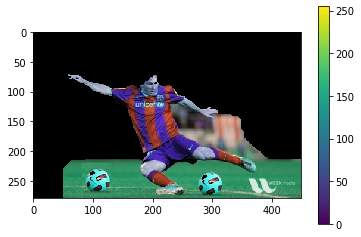

(<matplotlib.image.AxesImage at 0x7fdd7afac898>,
 None)

In [8]:
# Interactive Foreground Extraction using GrabCut Algorithm
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('messi5.jpg')
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,50,450,290)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,20,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img),plt.colorbar(),plt.show()



In [9]:
# # newmask is the mask image I manually labelled
# newmask = cv2.imread('newmask.png',0)

# # whereever it is marked white (sure foreground), change mask=1
# # whereever it is marked black (sure background), change mask=0
# mask[newmask == 0] = 0
# mask[newmask == 255] = 1

# mask, bgdModel, fgdModel = cv2.grabCut(img,mask,None,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_MASK)

# mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
# img = img*mask[:,:,np.newaxis]
# plt.imshow(img),plt.colorbar(),plt.show()